In [1]:
# Step 1: Install yfinance if not already installed
# !pip install yfinance

# Step 2: Import necessary libraries
import yfinance as yf
import pandas as pd

# Step 3: Download Tesla stock data using yfinance
tesla_data = yf.download("TSLA", start="2010-01-01", end="2023-12-31")

# Step 4: Reset the index to turn the date into a column
tesla_data.reset_index(inplace=True)

# Step 5: Save the data to a CSV file (optional)
tesla_data.to_csv("tesla_data.csv", index=False)

# Step 6: Display the first five rows
print(tesla_data.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price        Date     Close      High       Low      Open     Volume
Ticker                 TSLA      TSLA      TSLA      TSLA       TSLA
0      2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500
1      2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500
2      2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000
3      2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000
4      2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500


In [3]:
# Suppose revenue table is tables[1], adjust if yours is different
tesla_revenue = tables[1]

# Rename columns for clarity (if needed)
tesla_revenue.columns = ["Date", "Revenue"]

# Drop rows with empty or null revenue
tesla_revenue = tesla_revenue.dropna()

# Remove rows where Revenue is empty string or not valid
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"].str.strip() != ""]

# Remove dollar signs and commas, convert Revenue to numeric
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace('$', '').str.replace(',', '')
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"])

# Display cleaned revenue data
print(tesla_revenue.tail())

          Date  Revenue
58  2010-09-30       31
59  2010-06-30       28
60  2010-03-31       21
62  2009-09-30       46
63  2009-06-30       27


In [4]:
# Import libraries
import yfinance as yf
import pandas as pd

# Download GME stock data
gme_data = yf.download("GME", start="2010-01-01", end="2023-12-31")

# Reset the index so Date becomes a column
gme_data.reset_index(inplace=True)

# Save the data to CSV (optional)
gme_data.to_csv("gme_data.csv", index=False)

# Display the first five rows
print(gme_data.head())

[*********************100%***********************]  1 of 1 completed

Price        Date     Close      High       Low      Open     Volume
Ticker                  GME       GME       GME       GME        GME
0      2010-01-04  3.854644  3.863061  3.703152  3.714934   26702800
1      2010-01-05  3.959005  3.996036  3.854643  3.856327   21269600
2      2010-01-06  4.044851  4.056634  3.908507  3.948905   21471200
3      2010-01-07  3.443930  3.563441  3.268872  3.368184  164761200
4      2010-01-08  3.415315  3.573540  3.405215  3.474229   47872400


In [5]:
import requests
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Set headers to mimic a real browser visit
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0 Safari/537.36"
}

# Request the page with headers
response = requests.get(url, headers=headers)

# Parse all tables from the HTML text content
tables = pd.read_html(response.text)

# Usually the 2nd table (index 1) contains revenue data
gme_revenue = tables[1]

# Clean the dataframe
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

# Show last 5 rows
print(gme_revenue.tail())

          Date Revenue
60  2010-01-31  $3,524
61  2009-10-31  $1,835
62  2009-07-31  $1,739
63  2009-04-30  $1,981
64  2009-01-31  $3,492


C:\Users\User\AppData\Local\Temp\ipykernel_19196\3606192998.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


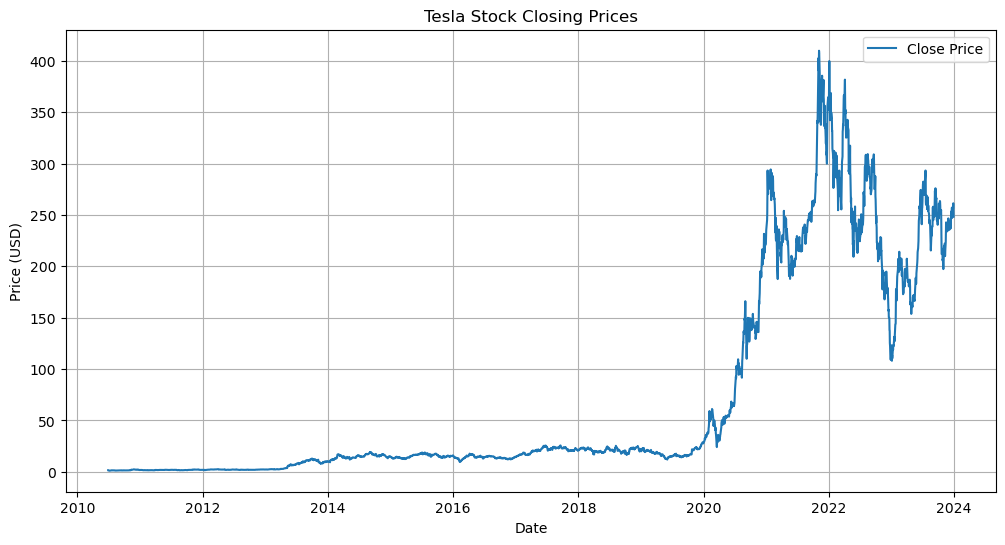

In [6]:
import matplotlib.pyplot as plt

# Sample make_graph function to plot stock data
def make_graph(df, title):
    plt.figure(figsize=(12,6))
    plt.plot(df['Date'], df['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming tesla_data is already loaded and has 'Date' and 'Close' columns
make_graph(tesla_data, "Tesla Stock Closing Prices")

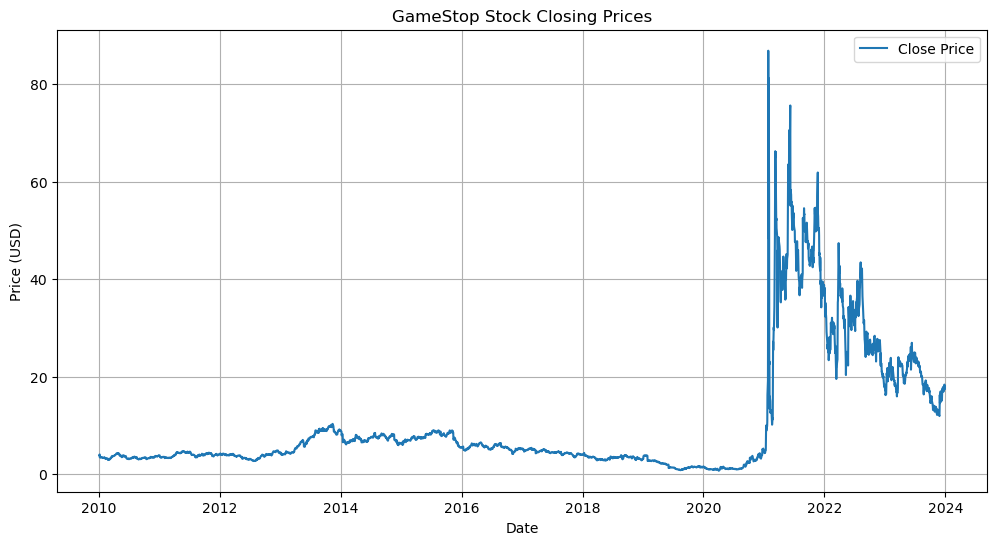

In [7]:
import matplotlib.pyplot as plt

# Reusing the make_graph function
def make_graph(df, title):
    plt.figure(figsize=(12,6))
    plt.plot(df['Date'], df['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming gme_data is already loaded and has 'Date' and 'Close' columns
make_graph(gme_data, "GameStop Stock Closing Prices")